In [ ]:
import pandas as pd
dataset = pd.read_csv('flights_clean.csv')
dataset

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISRUPTED,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_JFK,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,AIRLINE_TENDS_TO_DISRUPTIONS
0,0.500000,0.005766,0.283058,0.996534,0.027933,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.066987,0.550584,0.109084,0.313506,0.377095,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.933013,0.968876,0.890916,0.980510,0.779330,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.933013,0.257349,0.716942,0.688920,0.268156,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.750000,0.137604,0.716942,0.917184,0.122905,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.250000,0.948902,0.012536,0.493455,0.553073,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1996,0.066987,0.862396,0.987464,1.000000,0.175978,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,0.933013,0.005766,0.012536,0.446434,0.446927,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0.066987,0.449416,0.500000,0.146447,0.181564,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Training and test sets

In [ ]:
from sklearn.model_selection import train_test_split


X = dataset.drop('DISRUPTED', axis=1)  # Features
y = dataset['DISRUPTED']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1600, 26)
X_test shape: (400, 26)
y_train shape: (1600,)
y_test shape: (400,)


### Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import pearsonr


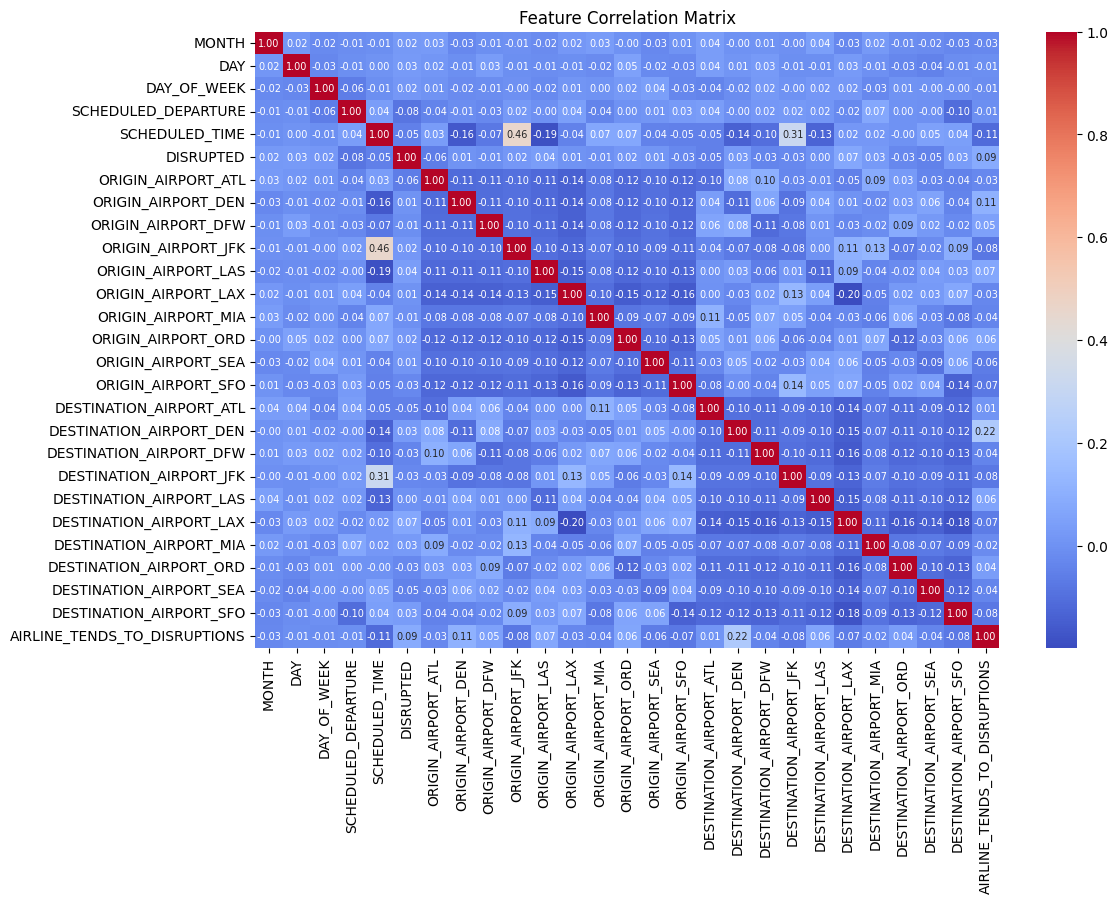

In [ ]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":7}, fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Initialize cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X=X, y=y, cv=cv)
predicted = cross_val_predict(gnb, X=X, y=y, cv=cv)


In [ ]:
# Evaluation metrics
conf_matrix = confusion_matrix(y, predicted)
acc_score = accuracy_score(y, predicted)
class_report = classification_report(y, predicted)
roc_auc = roc_auc_score(y, predicted)

# Display results
print("Cross-Validation Accuracy:", np.mean(cv_scores))
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", acc_score)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Cross-Validation Accuracy: 0.5650000000000001
Confusion Matrix:
 [[780 443]
 [427 350]]
Accuracy Score: 0.565
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64      1223
           1       0.44      0.45      0.45       777

    accuracy                           0.56      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.57      0.56      0.57      2000

ROC AUC Score: 0.5441132056013496


### Support Vector Machines (SVM)

#### SVM Lineal

In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred = knc.predict(X_test)

# Print the confusion matrix
print("Confusion matrix on test set:\n", confusion_matrix(y_test, pred))

# Print the accuracy
print("\nAccuracy on test set: ", accuracy_score(y_test, pred))

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion matrix on test set:
 [[228  17]
 [138  17]]

Accuracy on test set:  0.6125

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.93      0.75       245
           1       0.50      0.11      0.18       155

    accuracy                           0.61       400
   macro avg       0.56      0.52      0.46       400
weighted avg       0.58      0.61      0.53       400



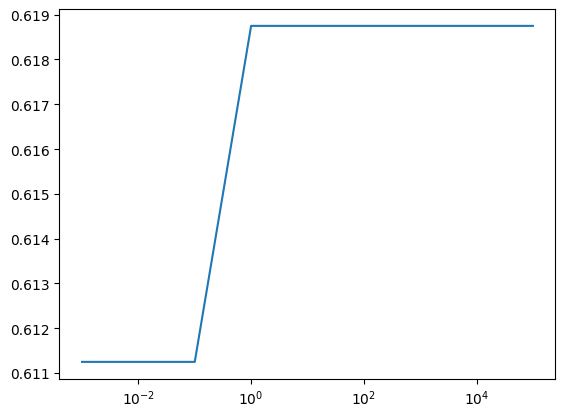

Confusion matrix on the test set:
 [[228  17]
 [138  17]]

Accuracy on the test set:  0.6125

Best value of parameter C found:  {'C': 1.0}

Number of supports:  1280 ( 1167 of them have slacks)
Proportion of supports:  0.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

Cs = np.logspace(-3, 5, num=9, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs, scores)
plt.show()

# Let's apply the best C parameter found to the test set
parval = grid_search.best_params_
knc = SVC(C=parval['C'], kernel='linear')
knc.fit(X_train, y_train)
pred = knc.predict(X_test)
print("Confusion matrix on the test set:\n", metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on the test set: ", metrics.accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ", parval)
print("\nNumber of supports: ", np.sum(knc.n_support_), "(", np.sum(np.abs(knc.dual_coef_) == parval['C']), "of them have slacks)")
print("Proportion of supports: ", np.sum(knc.n_support_) / X_train.shape[0])


#### SVM Polinòmica

In [ ]:
knc = SVC(kernel='poly',degree =2)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Confusion matrix on test set:
 [[213  32]
 [111  44]]

Accuracy on test set:  0.6425

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       245
           1       0.58      0.28      0.38       155

    accuracy                           0.64       400
   macro avg       0.62      0.58      0.56       400
weighted avg       0.63      0.64      0.61       400



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Create a list to store the results for each degree
results = []

# Test degrees from 2 to 20
for degree in range(2, 21):
    knc = SVC(kernel='poly', degree=degree, C=1)
    knc.fit(X_train, y_train)
    pred = knc.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    report = classification_report(y_test, pred)

    results.append({
        'Degree': degree,
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

# Print results for each degree
for result in results:
    print(f"Degree {result['Degree']}:\n")
    print("Confusion matrix on test set:\n", result['Confusion Matrix'])
    print("\nAccuracy on test set: ", result['Accuracy'])
    print("\nClassification Report:\n", result['Classification Report'])
    print("\n------------------------------------\n")


Degree 2:

Confusion matrix on test set:
 [[213  32]
 [111  44]]

Accuracy on test set:  0.6425

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       245
           1       0.58      0.28      0.38       155

    accuracy                           0.64       400
   macro avg       0.62      0.58      0.56       400
weighted avg       0.63      0.64      0.61       400


------------------------------------

Degree 3:

Confusion matrix on test set:
 [[203  42]
 [101  54]]

Accuracy on test set:  0.6425

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74       245
           1       0.56      0.35      0.43       155

    accuracy                           0.64       400
   macro avg       0.62      0.59      0.58       400
weighted avg       0.63      0.64      0.62       400


------------------------------------

Degree 4:

Confusion matri

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Create a list to store the results for each degree
results = []

# Test degrees from 2 to 20
for degree in range(2, 21):
    knc = SVC(kernel='poly', degree=degree, C=10)
    knc.fit(X_train, y_train)
    pred = knc.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    report = classification_report(y_test, pred)

    results.append({
        'Degree': degree,
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

# Print results for each degree
for result in results:
    print("\n-----------------C = 10-------------------\n")
    print(f"Degree {result['Degree']}:\n")
    print("Confusion matrix on test set:\n", result['Confusion Matrix'])
    print("\nAccuracy on test set: ", result['Accuracy'])
    print("\nClassification Report:\n", result['Classification Report'])
    print("\n------------------------------------\n")



-----------------C = 10-------------------

Degree 2:

Confusion matrix on test set:
 [[182  63]
 [ 94  61]]

Accuracy on test set:  0.6075

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.70       245
           1       0.49      0.39      0.44       155

    accuracy                           0.61       400
   macro avg       0.58      0.57      0.57       400
weighted avg       0.59      0.61      0.60       400


------------------------------------


-----------------C = 10-------------------

Degree 3:

Confusion matrix on test set:
 [[163  82]
 [ 90  65]]

Accuracy on test set:  0.57

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65       245
           1       0.44      0.42      0.43       155

    accuracy                           0.57       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.57      0.5

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Create a list to store the results for each degree
results = []

# Test degrees from 2 to 20
for degree in range(2, 21):
    knc = SVC(kernel='poly', degree=degree, C=0.1)
    knc.fit(X_train, y_train)
    pred = knc.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    report = classification_report(y_test, pred)

    results.append({
        'Degree': degree,
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

# Print results for each degree
for result in results:
    print("\n-----------------C = 0.1-------------------\n")
    print(f"Degree {result['Degree']}:\n")
    print("Confusion matrix on test set:\n", result['Confusion Matrix'])
    print("\nAccuracy on test set: ", result['Accuracy'])
    print("\nClassification Report:\n", result['Classification Report'])
    print("\n------------------------------------\n")



-----------------C = 0.1-------------------

Degree 2:

Confusion matrix on test set:
 [[245   0]
 [154   1]]

Accuracy on test set:  0.615

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       245
           1       1.00      0.01      0.01       155

    accuracy                           0.61       400
   macro avg       0.81      0.50      0.39       400
weighted avg       0.76      0.61      0.47       400


------------------------------------


-----------------C = 0.1-------------------

Degree 3:

Confusion matrix on test set:
 [[241   4]
 [150   5]]

Accuracy on test set:  0.615

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       245
           1       0.56      0.03      0.06       155

    accuracy                           0.61       400
   macro avg       0.59      0.51      0.41       400
weighted avg       0.59      0

In [ ]:
# Cs = np.logspace(-3, 11, num=15, base=10.0)

# param_grid = {'C': Cs}
# grid_search = GridSearchCV(SVC(kernel='poly', degree=2), param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train,y_train)

# scores = grid_search.cv_results_['mean_test_score']

# plt.semilogx(Cs,scores)
# plt.show()

# parval=grid_search.best_params_
# knc = SVC(kernel='poly',degree =2,C=parval['C'])
# knc.fit(X_train, y_train)
# pred=knc.predict(X_test)
# # print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
# print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
# print("\nBest combination of parameters found: ",parval)
# print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
# print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

#### SVM Radial

In [ ]:
knc = SVC()
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion matrix on test set:
 [[214  31]
 [113  42]]

Accuracy on test set:  0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.75       245
           1       0.58      0.27      0.37       155

    accuracy                           0.64       400
   macro avg       0.61      0.57      0.56       400
weighted avg       0.62      0.64      0.60       400



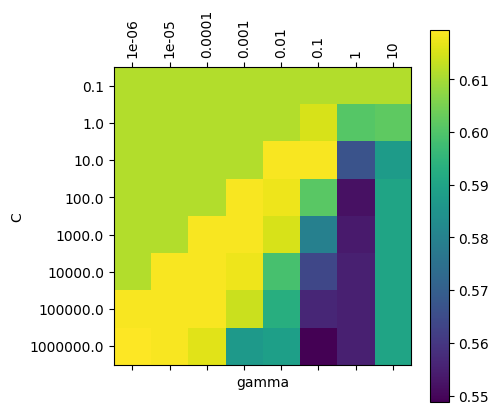


Best combination of parameters found:  {'C': 1000000.0, 'gamma': 1e-06}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
print("\nBest combination of parameters found: ",parval)

In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
rbf_C = 1000000
gamma = 1e-06

knc = SVC(C=rbf_C, gamma=gamma)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion matrix on test set:
 [[224  21]
 [134  21]]

Accuracy on test set:  0.6125

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.74       245
           1       0.50      0.14      0.21       155

    accuracy                           0.61       400
   macro avg       0.56      0.52      0.48       400
weighted avg       0.58      0.61      0.54       400



### KNN

Optimal k for euclidean: 31, Max Accuracy: 0.6188
Optimal k for manhattan: 35, Max Accuracy: 0.6131
Optimal k for chebyshev: 28, Max Accuracy: 0.6106


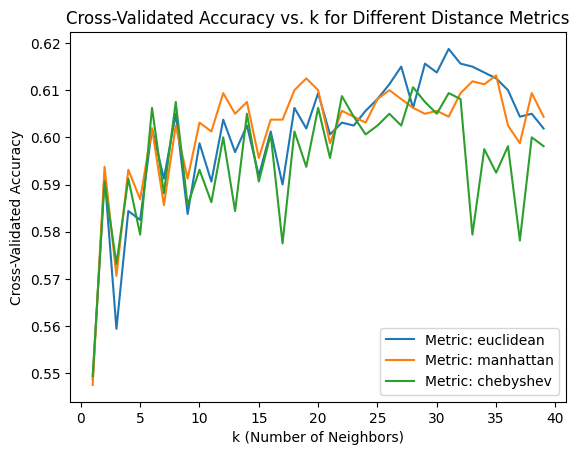

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb

# Choose a range of k values
k_values = np.arange(1, 40)

# List of distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Dictionary to store optimal k and accuracy for each metric
optimal_results_by_metric = {}

# Loop over distance metrics
for metric in distance_metrics:
    optimal_k = None
    max_accuracy = 0
    accuracy_scores = []

    # Loop over k values
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        # Use cross_val_score to evaluate accuracy using cross-validation
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        mean_accuracy = scores.mean()
        accuracy_scores.append(mean_accuracy)

        # Update optimal k if a higher accuracy is found
        if mean_accuracy > max_accuracy:
            max_accuracy = mean_accuracy
            optimal_k = k

    # Store optimal results for the current metric
    optimal_results_by_metric[metric] = {'optimal_k': optimal_k, 'max_accuracy': max_accuracy}

    # Plot the results for the current metric
    plt.plot(k_values, accuracy_scores, label=f'Metric: {metric}')

# Print optimal results for each metric
for metric, results in optimal_results_by_metric.items():
    print(f"Optimal k for {metric}: {results['optimal_k']}, Max Accuracy: {results['max_accuracy']:.4f}")

# Plot the overall results
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. k for Different Distance Metrics')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have X_test and y_test for testing
k_optimal = 31
distance_metric = 'euclidean'

# Create and fit the KNeighborsClassifier with the optimal parameters
knn_optimal = KNeighborsClassifier(n_neighbors=k_optimal, metric=distance_metric)
knn_optimal.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = knn_optimal.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Optimal k and Distance Metric (Euclidean):")
print(report)


Classification Report for Optimal k and Distance Metric (Euclidean):
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       245
           1       0.55      0.25      0.34       155

    accuracy                           0.63       400
   macro avg       0.60      0.56      0.54       400
weighted avg       0.61      0.63      0.59       400



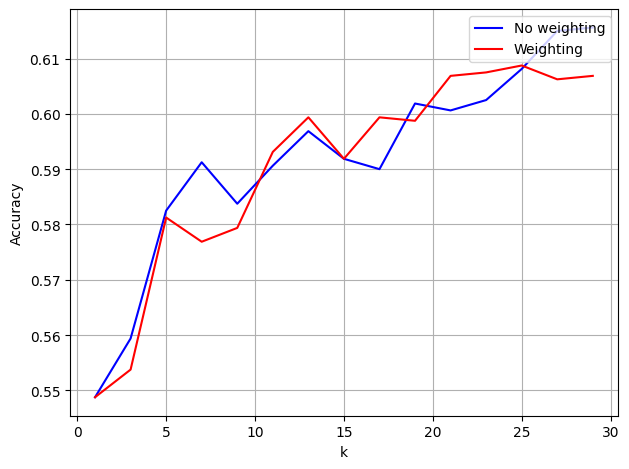

In [ ]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors as nb

# Define the parameter grid including 'n_neighbors', 'weights', and 'metric'
params = {
    'n_neighbors': list(range(1, 30, 2)),
    'weights': ('distance', 'uniform'),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knc = nb.KNeighborsClassifier()

# Create GridSearchCV with the parameter grid
clf = GridSearchCV(knc, param_grid=params, cv=10, n_jobs=-1)  # If cv is integer, by default is Stratified
clf.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Params:", clf.best_params_)
print("Accuracy:", clf.best_score_)


Best Params: {'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'uniform'}
Accuracy: 0.615625


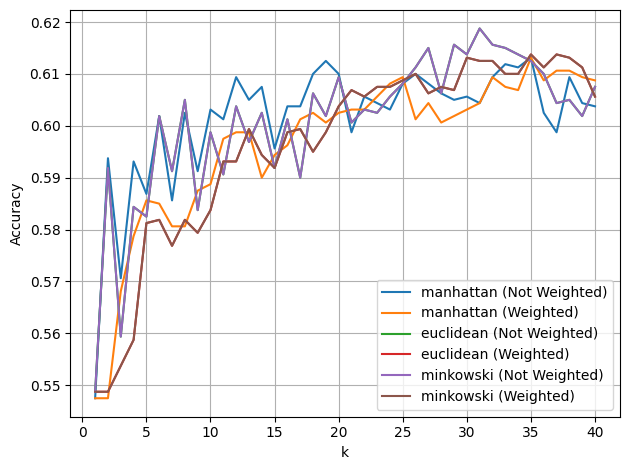

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

# Define the range of k values from 1 to 40 with steps of 1
k_values = list(range(1, 41))

# List of distance metrics to compare
distance_metrics = ['manhattan', 'euclidean', 'minkowski']

# Initialize a dictionary to store results for each distance metric and weighting
results = {metric: {'weighted': [], 'not_weighted': []} for metric in distance_metrics}

# Loop through each distance metric
for metric in distance_metrics:
    for k in k_values:
        # Create a k-nearest neighbors classifier without weighting
        clf_not_weighted = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform', metric=metric)

        # Create a k-nearest neighbors classifier with distance-based weighting
        clf_weighted = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)

        # Perform cross-validation for both classifiers
        cv_scores_not_weighted = cross_val_score(clf_not_weighted, X=X_train, y=y_train, cv=10)
        cv_scores_weighted = cross_val_score(clf_weighted, X=X_train, y=y_train, cv=10)

        # Calculate and store the mean accuracies
        mean_accuracy_not_weighted = np.mean(cv_scores_not_weighted)
        mean_accuracy_weighted = np.mean(cv_scores_weighted)

        results[metric]['not_weighted'].append(mean_accuracy_not_weighted)
        results[metric]['weighted'].append(mean_accuracy_weighted)

# Plot the results for each distance metric
for metric, accuracies in results.items():
    plt.plot(k_values, accuracies['not_weighted'], label=f'{metric} (Not Weighted)')
    plt.plot(k_values, accuracies['weighted'], label=f'{metric} (Weighted)')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')  # Move the legend to the lower right
plt.grid()
plt.tight_layout()
plt.show()


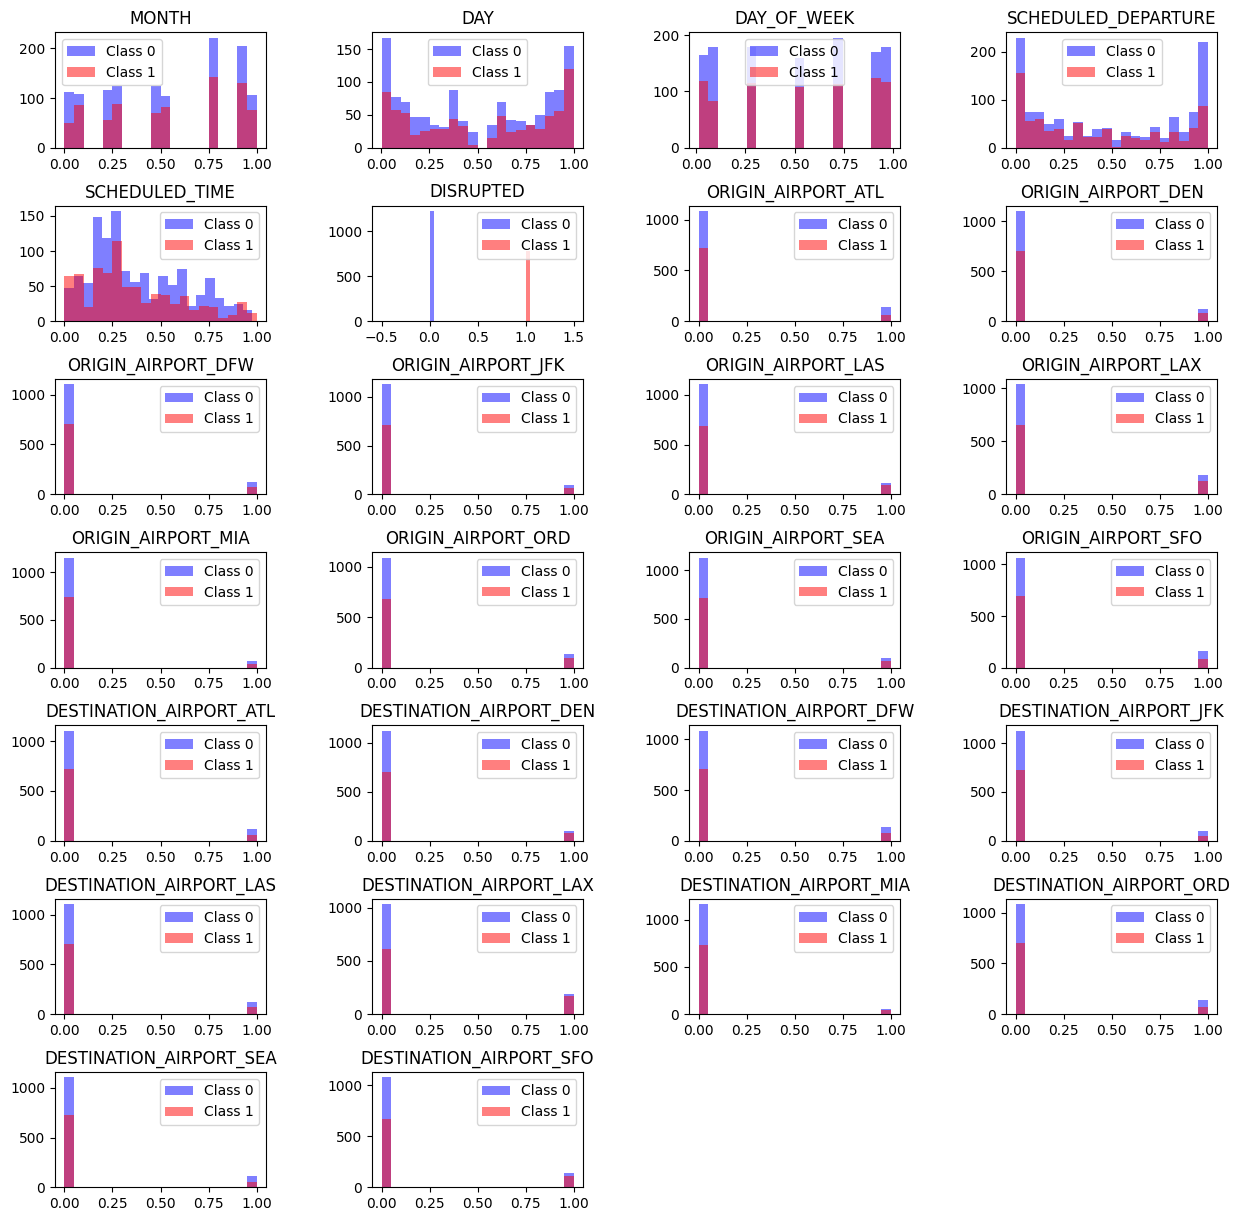

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(dataset.columns[:-1]):
    plt.subplot(7, 4, i + 1)
    plt.hist(dataset[dataset['DISRUPTED'] == 0][col], bins=20, alpha=0.5, label='Class 0', color='blue')
    plt.hist(dataset[dataset['DISRUPTED'] == 1][col], bins=20, alpha=0.5, label='Class 1', color='red')
    plt.title(f'{col}')
    plt.legend()

plt.show()


### DecisionTree

Optimal max depth: 4, Max Accuracy: 0.6288
Classification Report:
                precision    recall  f1-score   support

No Disruption       0.64      0.92      0.75       245
   Disruption       0.59      0.17      0.27       155

     accuracy                           0.63       400
    macro avg       0.61      0.55      0.51       400
 weighted avg       0.62      0.63      0.57       400



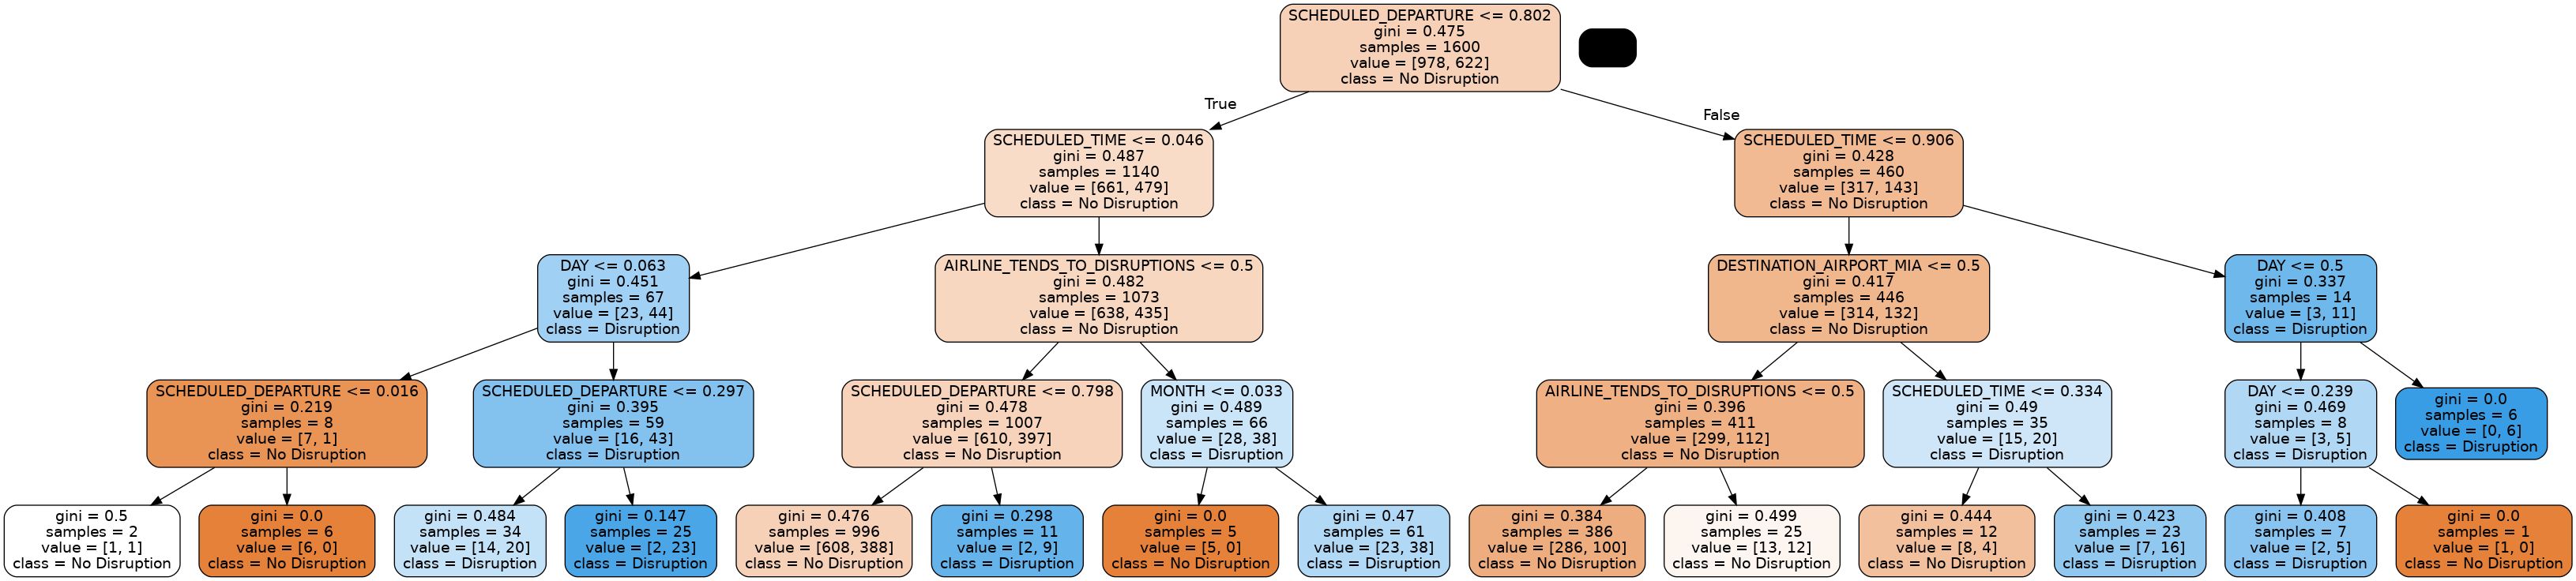

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

# Choose a range of max depth values
max_depth_values = np.arange(1, 11)

# Dictionary to store optimal max depth and accuracy
optimal_results_tree = {}

# Loop over max depth values
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Use cross_val_score to evaluate accuracy using cross-validation
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    # Store optimal results for the current max depth
    optimal_results_tree[max_depth] = mean_accuracy

# Find the optimal max depth
optimal_max_depth = max(optimal_results_tree, key=optimal_results_tree.get)

# Print optimal results
print(f"Optimal max depth: {optimal_max_depth}, Max Accuracy: {optimal_results_tree[optimal_max_depth]:.4f}")

# Train the decision tree with the optimal max depth on the entire training set
best_tree = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_tree.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred, target_names=['No Disruption', 'Disruption'])
print("Classification Report:\n", report)

# Visualize the decision tree
dot_data = export_graphviz(best_tree, out_file=None, feature_names=X.columns, class_names=['No Disruption', 'Disruption'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions on the validation set
y_val_pred = best_tree.predict(X)

# Calculate precision, recall, and F1-score for each class
precision_class_0 = precision_score(y, y_val_pred, pos_label=0)
recall_class_0 = recall_score(y, y_val_pred, pos_label=0)
f1_class_0 = f1_score(y, y_val_pred, pos_label=0)

precision_class_1 = precision_score(y, y_val_pred, pos_label=1)
recall_class_1 = recall_score(y, y_val_pred, pos_label=1)
f1_class_1 = f1_score(y, y_val_pred, pos_label=1)

# Print the results
print("Class 0:")
print("Precision:", precision_class_0)
print("Recall:", recall_class_0)
print("F1-score:", f1_class_0)
print("\nClass 1:")
print("Precision:", precision_class_1)
print("Recall:", recall_class_1)
print("F1-score:", f1_class_1)


Class 0:
Precision: 0.6457750419697817
Recall: 0.9435813573180704
F1-score: 0.7667774086378738

Class 1:
Precision: 0.676056338028169
Recall: 0.18532818532818532
F1-score: 0.2909090909090909


In [ ]:
from sklearn.tree import export_text

# Train the decision tree with the optimal max depth on the entire training set
best_tree = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Extract and display rules with sample and class information
tree_rules = export_text(best_tree, feature_names=list(X.columns), show_weights=True, spacing=3)
print(tree_rules)


|--- SCHEDULED_DEPARTURE <= 0.80
|   |--- SCHEDULED_TIME <= 0.05
|   |   |--- DAY <= 0.06
|   |   |   |--- SCHEDULED_DEPARTURE <= 0.02
|   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |--- SCHEDULED_DEPARTURE >  0.02
|   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |--- DAY >  0.06
|   |   |   |--- SCHEDULED_DEPARTURE <= 0.30
|   |   |   |   |--- weights: [14.00, 20.00] class: 1
|   |   |   |--- SCHEDULED_DEPARTURE >  0.30
|   |   |   |   |--- weights: [2.00, 23.00] class: 1
|   |--- SCHEDULED_TIME >  0.05
|   |   |--- AIRLINE_TENDS_TO_DISRUPTIONS <= 0.50
|   |   |   |--- SCHEDULED_DEPARTURE <= 0.80
|   |   |   |   |--- weights: [608.00, 388.00] class: 0
|   |   |   |--- SCHEDULED_DEPARTURE >  0.80
|   |   |   |   |--- weights: [2.00, 9.00] class: 1
|   |   |--- AIRLINE_TENDS_TO_DISRUPTIONS >  0.50
|   |   |   |--- MONTH <= 0.03
|   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |--- MONTH >  0.03
|   |   |   |   |--- weights: [23.00, 38.00] class

### Meta-Learning

#### Voting scheme

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

cv = 50

clf1 = GaussianNB()

params = {'n_neighbors': list(range(1, 30, 2)), 'weights': ('distance', 'uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=-1)
clf.fit(X, y)
print("Best Params for Knn =", clf.best_params_, "Accuracy =", clf.best_score_)
parval = clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'], weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')

for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes', 'Knn (3)', 'Dec. Tree']):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

# Calculate and print classification reports for each classifier
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
report1 = classification_report(y_test, y_pred1, target_names=['No Disruption', 'Disruption'])
print("Classification Report for Naive Bayes:\n", report1)

clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
report2 = classification_report(y_test, y_pred2, target_names=['No Disruption', 'Disruption'])
print("Classification Report for Knn (3):\n", report2)

clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
report3 = classification_report(y_test, y_pred3, target_names=['No Disruption', 'Disruption'])
print("Classification Report for Dec. Tree:\n", report3)


Best Params for Knn = {'n_neighbors': 27, 'weights': 'uniform'} Accuracy = 0.6235
Accuracy: 0.562 [Naive Bayes]
Accuracy: 0.624 [Knn (3)]
Accuracy: 0.576 [Dec. Tree]
Classification Report for Naive Bayes:
                precision    recall  f1-score   support

No Disruption       0.67      0.69      0.68       245
   Disruption       0.48      0.46      0.47       155

     accuracy                           0.60       400
    macro avg       0.58      0.57      0.57       400
 weighted avg       0.60      0.60      0.60       400

Classification Report for Knn (3):
                precision    recall  f1-score   support

No Disruption       0.64      0.84      0.72       245
   Disruption       0.49      0.25      0.33       155

     accuracy                           0.61       400
    macro avg       0.57      0.54      0.53       400
 weighted avg       0.58      0.61      0.57       400

Classification Report for Dec. Tree:
                precision    recall  f1-score   support

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.608 [Majority Voting]


In [ ]:
from itertools import product

best_accuracy = 0
best_weights = None

for weights in product(range(1, 4), repeat=3):
    eclf = VotingClassifier(estimators=[('nb', clf1), ('knn', clf2), ('dt', clf3)],
                            voting='soft', weights=weights)
    scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_weights = weights

print("Best Weights:", best_weights, "with Accuracy:", best_accuracy)


Best Weights: (3, 3, 2) with Accuracy: 0.6150000000000001


#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.564 [1]
Accuracy: 0.586 [2]
Accuracy: 0.582 [5]
Accuracy: 0.607 [10]
Accuracy: 0.614 [20]
Accuracy: 0.619 [50]
Accuracy: 0.628 [100]
Accuracy: 0.629 [200]

Accuracy: 0.570 [1]
Accuracy: 0.574 [2]
Accuracy: 0.588 [5]
Accuracy: 0.589 [10]
Accuracy: 0.597 [20]
Accuracy: 0.613 [50]
Accuracy: 0.624 [100]
Accuracy: 0.627 [200]


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.546 [1]
Accuracy: 0.589 [2]
Accuracy: 0.574 [5]
Accuracy: 0.609 [10]
Accuracy: 0.609 [20]
Accuracy: 0.621 [50]
Accuracy: 0.630 [100]
Accuracy: 0.621 [200]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.565 [1]
Accuracy: 0.593 [2]
Accuracy: 0.591 [5]
Accuracy: 0.589 [10]
Accuracy: 0.607 [20]
Accuracy: 0.593 [50]
Accuracy: 0.602 [100]
Accuracy: 0.604 [200]


#### Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.605 [1]
Accuracy: 0.619 [2]
Accuracy: 0.624 [5]
Accuracy: 0.623 [10]
Accuracy: 0.620 [20]
Accuracy: 0.614 [50]
Accuracy: 0.612 [100]
Accuracy: 0.610 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.611 [1]
Accuracy: 0.608 [2]
Accuracy: 0.597 [5]
Accuracy: 0.604 [10]
Accuracy: 0.573 [20]
Accuracy: 0.581 [50]
Accuracy: 0.583 [100]
Accuracy: 0.589 [200]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.612 [1]
Accuracy: 0.612 [2]
Accuracy: 0.618 [5]
Accuracy: 0.625 [10]
Accuracy: 0.630 [20]
Accuracy: 0.630 [50]
Accuracy: 0.624 [100]
Accuracy: 0.616 [200]


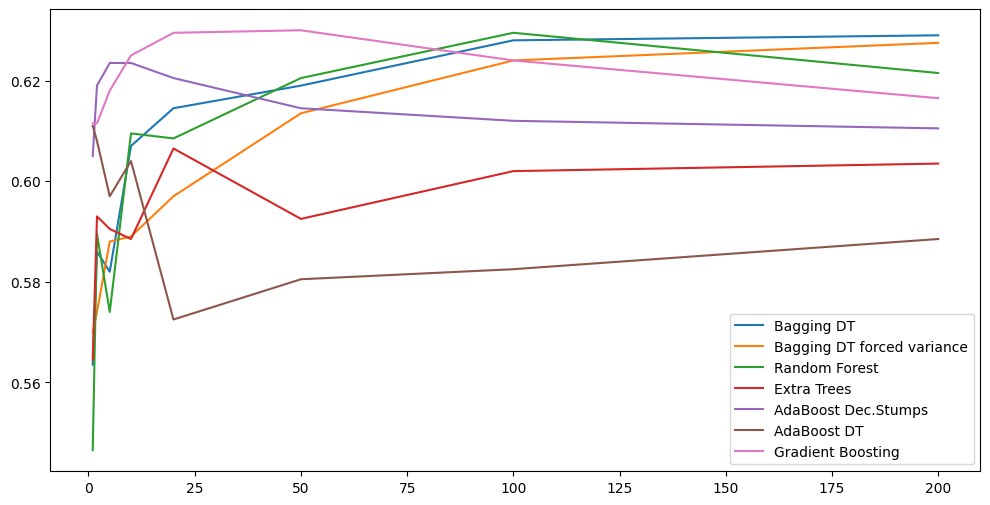

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

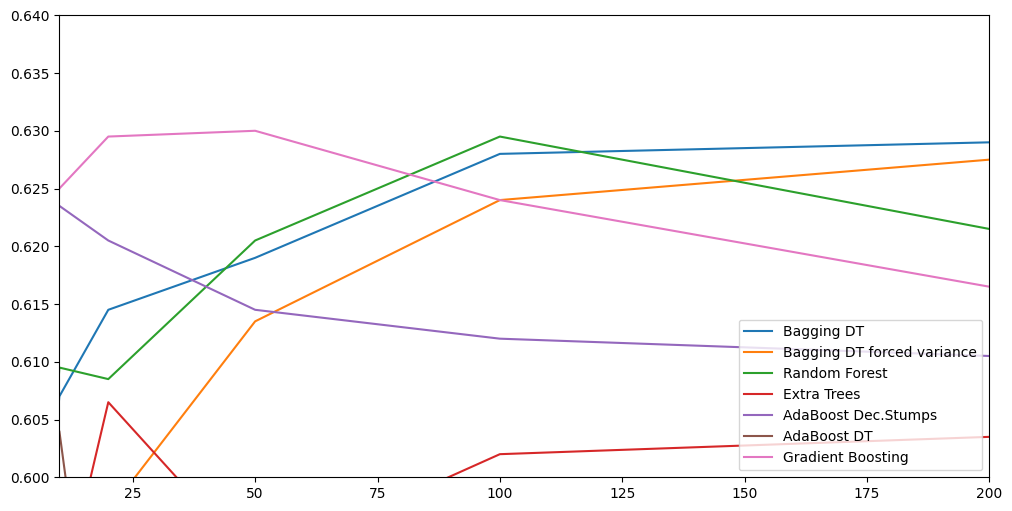

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.60,0.64)
plt.show()

In [ ]:
n_estimators = 50
clf = GradientBoostingClassifier(n_estimators=n_estimators)
# Perform cross-validation and get predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Generate the classification report
report = classification_report(y, y_pred)

# Print the classification report
print("Classification Report for Gradient Boosting with 50 features and %d estimators:" % n_estimators)
print(report)

Classification Report for Gradient Boosting with 50 features and 50 estimators:
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1223
           1       0.57      0.19      0.29       777

    accuracy                           0.63      2000
   macro avg       0.61      0.55      0.52      2000
weighted avg       0.61      0.63      0.57      2000



### RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)
print(X.columns)

[0.10454416 0.15944439 0.10482869 0.1999605  0.19024067 0.01172595
 0.01159917 0.01228079 0.00937141 0.01177061 0.0128739  0.00934324
 0.01339658 0.01144936 0.01245433 0.01009997 0.01121266 0.0112264
 0.00884189 0.01091455 0.01440882 0.0102116  0.01129195 0.01046404
 0.01213964 0.01390475]
Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'ORIGIN_AIRPORT_ATL', 'ORIGIN_AIRPORT_DEN', 'ORIGIN_AIRPORT_DFW',
       'ORIGIN_AIRPORT_JFK', 'ORIGIN_AIRPORT_LAS', 'ORIGIN_AIRPORT_LAX',
       'ORIGIN_AIRPORT_MIA', 'ORIGIN_AIRPORT_ORD', 'ORIGIN_AIRPORT_SEA',
       'ORIGIN_AIRPORT_SFO', 'DESTINATION_AIRPORT_ATL',
       'DESTINATION_AIRPORT_DEN', 'DESTINATION_AIRPORT_DFW',
       'DESTINATION_AIRPORT_JFK', 'DESTINATION_AIRPORT_LAS',
       'DESTINATION_AIRPORT_LAX', 'DESTINATION_AIRPORT_MIA',
       'DESTINATION_AIRPORT_ORD', 'DESTINATION_AIRPORT_SEA',
       'DESTINATION_AIRPORT_SFO', 'AIRLINE_TENDS_TO_DISRUPTIONS'],
      dtype='object')


In [ ]:
import warnings
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Filter out the UserWarning related to feature names
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Create SelectFromModel with importance_getter="auto"
model = SelectFromModel(clf, prefit=True, threshold=0.05, importance_getter="auto")
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))


(2000, 5)
0.5855
0.5414999999999999


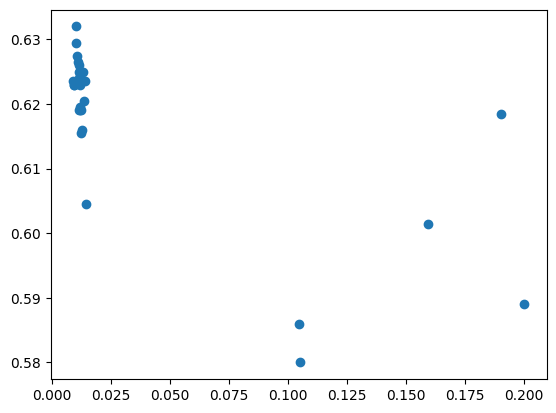

Best threshold:  0.010099967903764263


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)

plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

(2000, 23)
Original:  0.5579999999999999
With FS:  0.632
